In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('DataSet5_2.csv')

In [4]:
data.describe()

,count,holiday,humidity,registered,summer,temp,windspeed,workingday
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,125.61300,0.024000,60.418333,99.203333,0.455667,18.404353,13.911605,0.681333
std,124.26389,0.153075,20.839948,99.333001,0.498114,8.363474,8.735386,0.466037
min,1.00000,0.000000,0.000000,0.000000,0.000000,2.460000,0.000000,0.000000
25%,28.00000,0.000000,45.000000,23.000000,0.000000,10.660000,7.001500,0.000000
50%,88.00000,0.000000,59.000000,73.000000,0.000000,18.040000,12.998000,1.000000
75%,182.00000,0.000000,77.000000,141.000000,1.000000,25.420000,19.001200,1.000000
max,638.00000,1.000000,100.000000,555.000000,1.000000,38.540000,56.996900,1.000000


<AxesSubplot: >

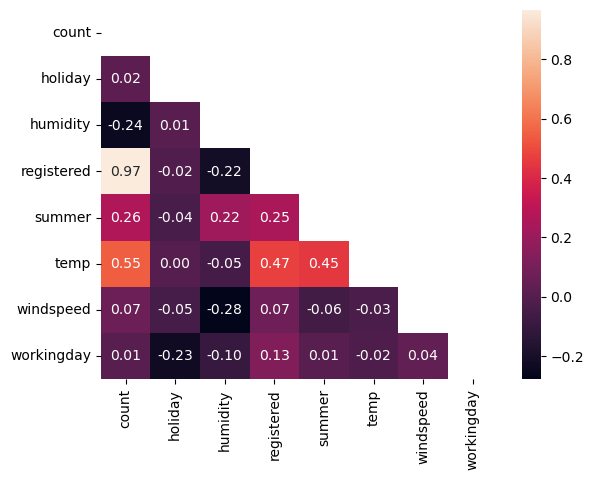

In [3]:
sns.heatmap(data.corr(), mask=~np.tril(np.ones_like(data.corr(), dtype=bool),k=-1), annot=True, fmt='.2f')

In [4]:
data.drop(columns='registered', inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data_train, data_test = train_test_split(data)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

In [9]:
X = data_train.drop(columns='count')
y = data_train['count']


In [10]:
model.fit(X, y)

LinearRegression()

In [11]:
X_test = data_test.drop(columns='count')
y_test = data_test['count']

In [12]:
model.score(X_test, y_test)

0.35836528141224455

In [13]:
thr = 100

In [14]:
data_test['profit'] = data_test['count'] > thr
data_train['profit'] = data_train['count'] > thr

In [15]:
prediction = model.predict(X_test) > thr

In [16]:
labels = y_test > thr

In [17]:
accuracy = (prediction == labels).sum() / len(data_test)

In [18]:
accuracy

0.7146666666666667

In [19]:
tp = (prediction & labels).sum()
tn = (~prediction & ~labels).sum()
fp = (prediction & ~labels).sum()
fn = (~prediction & labels).sum()

In [20]:
np.array([[tp, fp],[fn, tn]])

array([[302, 166],
       [ 48, 234]])

In [21]:
precition = tp / (tp + fp)
recall = tp / (tp + fn)

In [22]:
precition, recall

(0.6452991452991453, 0.8628571428571429)

In [23]:
b = 0.5

In [24]:
f1 = (precition * recall) / ((1-b)*precition + b*recall)

In [25]:
f1

0.7383863080684597

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
X = data_train.drop(columns=['count','profit'])
y = data_train['profit']

In [29]:
model.fit(X, y)

LogisticRegression()

In [31]:
X_test = data_test.drop(columns=['count','profit'])
y_test = data_test['profit']

In [32]:
model.score(X_test, y_test)

0.7293333333333333

In [33]:
from sklearn.metrics import plot_confusion_matrix

/home/rs/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


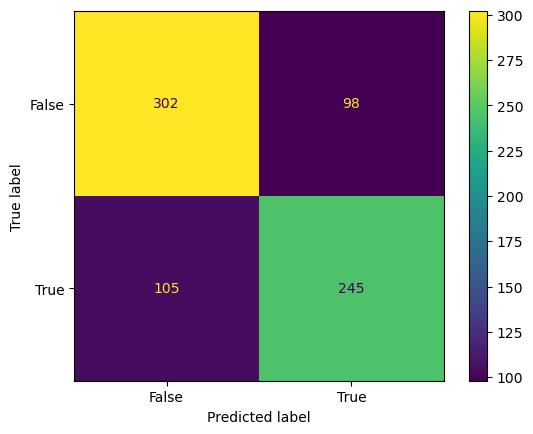

In [34]:
plot_confusion_matrix(model, X_test, y_test)

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [38]:
labels, predictions = y_test, model.predict(X_test)

In [41]:
precision_score(labels, predictions)

0.7142857142857143

In [42]:
recall_score(labels, predictions)

0.7

In [40]:
f1_score(labels, predictions)

0.7070707070707072